In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from jupyterthemes import jtplot
#倒入一些必要的库

In [2]:
#读取数据
df1=pd.read_excel('dataframe4.xlsx') 
df2=pd.read_excel('location4.xlsx')
# df1=pd.read_excel('dataframe3.xlsx') 
# df2=pd.read_excel('location3.xlsx')
# df1=pd.read_csv('dataframe2.csv') 
# df2=pd.read_csv('location.csv')
df1=df1.iloc[:,:]
df2=df2.iloc[:,:]
df1

,1到达时间ns,1幅度dB,1计数,1上升时间us,2到达时间ns,2幅度dB,2计数,2上升时间us,3到达时间ns,3幅度dB,3计数,3上升时间us
0,9267224050,90.63,424,313.6,9267220850,91.12,412,1234.4,9267228050,89.24,459,2644.4
1,23652196450,90.28,374,288.0,23652197650,90.54,392,396.8,23652240850,90.06,444,2520.8
2,92039737250,92.12,436,4885.1,92039735650,96.30,527,465.0,92039727250,94.75,543,836.3
3,108145405250,90.12,434,498.0,108145414050,94.13,455,448.4,108145394850,92.94,515,1942.0
4,8030032050,90.04,394,1472.4,8030039650,92.83,441,484.8,8030034450,91.46,467,3451.2
...,...,...,...,...,...,...,...,...,...,...,...,...
60,8775982050,92.04,539,1359.2,8775939650,93.68,563,354.4,8775930850,91.36,488,1827.2
61,29922012050,80.29,169,1813.6,29921797250,83.99,355,7084.8,29921677250,82.66,324,8211.2
62,34663454450,78.51,166,416.8,34663258850,93.31,382,254.4,34663420450,86.00,366,1253.2
63,46767207650,74.85,47,711.6,46766781650,93.08,589,415.2,46767042050,81.91,515,1804.4


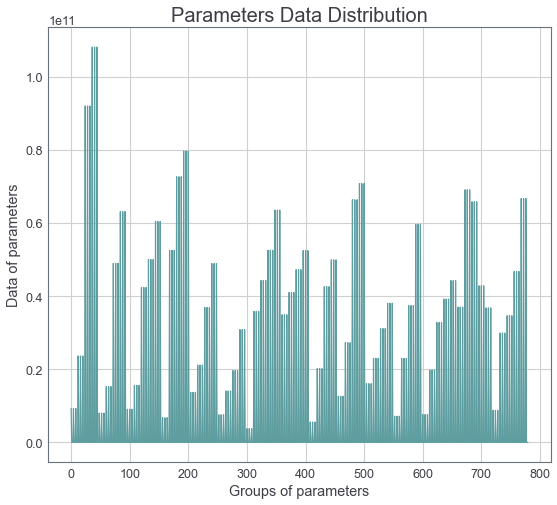

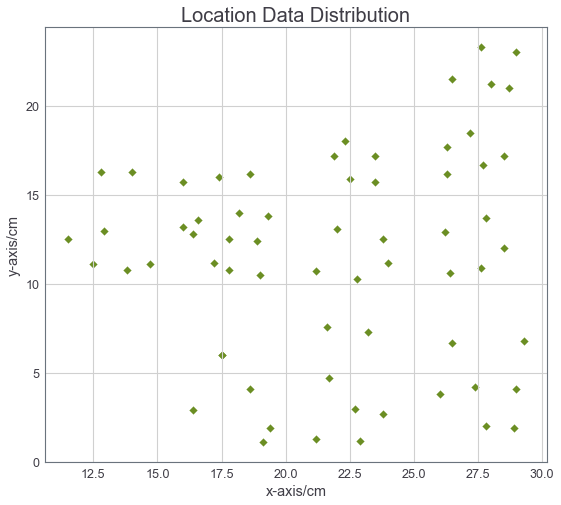

In [154]:
jtplot.style(theme='grade3')
draw1=df1.values.reshape(1,-1)
draw1=draw1[0,:]
draw2x=df2['x']
#draw2x=draw2[0,:63]

draw2y=df2['y']
plt.figure(figsize=(9,8))
plt.plot(draw1,c='#5F9EA0')
plt.title("Parameters Data Distribution",fontsize='20')
plt.xlabel('Groups of parameters')#添加标题
plt.ylabel('Data of parameters')
plt.savefig('E:/论文写作/parameterDistribution.jpg',dpi=300)

plt.figure(figsize=(9,8))
plt.scatter(draw2x,draw2y, c='#6B8E23', marker='D')
plt.title("Location Data Distribution",fontsize='20')
plt.xlabel('x-axis/cm')
plt.ylabel('y-axis/cm')#添加标题
plt.savefig('E:/论文写作/LocationDDistribution.jpg',dpi=300)
# plt.figure(figsize=(12,6))
# plt.plot(draw2y)
# plt.title("Y-axis Location Data Distribution",fontsize='20') #添加标题

In [4]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
dfl0=min_max_scaler.fit_transform(df2)
dfl = pd.DataFrame(dfl0, columns=df2.columns)
# dfl=df2
X=df.iloc[:,:]
y=dfl.iloc[:,0]
print(X.shape)
print(y.shape)


(65, 12)
(65,)


In [5]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['target'])

x=X
input_size=len(x.iloc[1,:])
cut=len(y)//5#取最后cut=10天为测试集
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
x.iloc[:-cut]
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

624
156
52
13


In [141]:
#建立bp模型 训练 
from keras import regularizers  # 正则化
from keras.models import Sequential
from keras.layers.core import Dense, Activation
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
model = Sequential()  #层次模型
model.add(Dense(3,input_dim=input_size))#init='uniform')) #输入层，Dense表示BP层
#model.add(Dense(3,input_dim=input_size))#init='uniform')) #输入层，Dense表示BP层
model.add(Activation('tanh'))  #添加激活函数
model.add(Dense(4)) # 施加在偏置向量上的正则项) #中间层
#model.add(Dense(4)) # 施加在偏置向量上的正则项) #中间层
#model.add(Dense(4,init='uniform')) #中间层
model.add(Activation('tanh'))  #添加激活函数
model.add(Dense(1))
model.add(Activation('linear'))#输出层
model.compile(loss='mean_squared_error',optimizer='Adam') #编译模型
history=model.fit(X_train, y_train, epochs =800, 
                  batch_size = 10,
                 validation_data = (X_test, y_test)
                 ) #训练模型nb_epoch=50次

Epoch 1/800
6/6 [==============================] - 0s 25ms/step - loss: 0.2966 - val_loss: 0.2557
Epoch 2/800
6/6 [==============================] - 0s 6ms/step - loss: 0.2535 - val_loss: 0.2141
Epoch 3/800
6/6 [==============================] - 0s 5ms/step - loss: 0.2170 - val_loss: 0.1785
Epoch 4/800
6/6 [==============================] - 0s 6ms/step - loss: 0.1868 - val_loss: 0.1487
Epoch 5/800
6/6 [==============================] - 0s 6ms/step - loss: 0.1599 - val_loss: 0.1256
Epoch 6/800
6/6 [==============================] - 0s 6ms/step - loss: 0.1383 - val_loss: 0.1077
Epoch 7/800
6/6 [==============================] - 0s 6ms/step - loss: 0.1234 - val_loss: 0.0936
Epoch 8/800
6/6 [==============================] - 0s 5ms/step - loss: 0.1116 - val_loss: 0.0829
Epoch 9/800
6/6 [==============================] - 0s 7ms/step - loss: 0.1039 - val_loss: 0.0755
Epoch 10/800
6/6 [==============================] - 0s 7ms/step - loss: 0.0973 - val_loss: 0.0708
Epoch 11/800
6/6 [==========

6/6 [==============================] - 0s 5ms/step - loss: 0.0652 - val_loss: 0.0506
Epoch 85/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0646 - val_loss: 0.0504
Epoch 86/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0639 - val_loss: 0.0501
Epoch 87/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0630 - val_loss: 0.0500
Epoch 88/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0624 - val_loss: 0.0500
Epoch 89/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0632 - val_loss: 0.0506
Epoch 90/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0614 - val_loss: 0.0504
Epoch 91/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0611 - val_loss: 0.0503
Epoch 92/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0609 - val_loss: 0.0503
Epoch 93/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0603 - val_loss: 0.0501
Epoch 94/800
6/6 [===============

Epoch 167/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0444 - val_loss: 0.0516
Epoch 168/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0444 - val_loss: 0.0512
Epoch 169/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0441 - val_loss: 0.0517
Epoch 170/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0445 - val_loss: 0.0530
Epoch 171/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0445 - val_loss: 0.0530
Epoch 172/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0441 - val_loss: 0.0521
Epoch 173/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0438 - val_loss: 0.0513
Epoch 174/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0436 - val_loss: 0.0509
Epoch 175/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0437 - val_loss: 0.0506
Epoch 176/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.0499
Epoch 177/

6/6 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.0420
Epoch 250/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0420
Epoch 251/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0391 - val_loss: 0.0422
Epoch 252/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0435
Epoch 253/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.0439
Epoch 254/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0385 - val_loss: 0.0430
Epoch 255/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0426
Epoch 256/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0425
Epoch 257/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0389 - val_loss: 0.0425
Epoch 258/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0426
Epoch 259/800
6/6 [=====

Epoch 332/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.0394
Epoch 333/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0343 - val_loss: 0.0403
Epoch 334/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.0399
Epoch 335/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0341 - val_loss: 0.0400
Epoch 336/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0341 - val_loss: 0.0406
Epoch 337/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.0407
Epoch 338/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0342 - val_loss: 0.0418
Epoch 339/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0346 - val_loss: 0.0421
Epoch 340/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0340 - val_loss: 0.0409
Epoch 341/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0338 - val_loss: 0.0400
Epoch 342/

6/6 [==============================] - 0s 5ms/step - loss: 0.0303 - val_loss: 0.0359
Epoch 415/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.0366
Epoch 416/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.0355
Epoch 417/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.0353
Epoch 418/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.0356
Epoch 419/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.0363
Epoch 420/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0301 - val_loss: 0.0366
Epoch 421/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.0370
Epoch 422/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0303 - val_loss: 0.0380
Epoch 423/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0304 - val_loss: 0.0373
Epoch 424/800
6/6 [=====

Epoch 497/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0272 - val_loss: 0.0374
Epoch 498/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0365
Epoch 499/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0269 - val_loss: 0.0362
Epoch 500/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0270 - val_loss: 0.0360
Epoch 501/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0269 - val_loss: 0.0360
Epoch 502/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0266 - val_loss: 0.0358
Epoch 503/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.0360
Epoch 504/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0272 - val_loss: 0.0356
Epoch 505/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0267 - val_loss: 0.0360
Epoch 506/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0361
Epoch 507/

6/6 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.0366
Epoch 580/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0254 - val_loss: 0.0365
Epoch 581/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0251 - val_loss: 0.0366
Epoch 582/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.0367
Epoch 583/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0249 - val_loss: 0.0371
Epoch 584/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0255 - val_loss: 0.0377
Epoch 585/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.0378
Epoch 586/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0251 - val_loss: 0.0380
Epoch 587/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0249 - val_loss: 0.0383
Epoch 588/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.0384
Epoch 589/800
6/6 [=====

Epoch 662/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0379
Epoch 663/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.0382
Epoch 664/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0235 - val_loss: 0.0376
Epoch 665/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0377
Epoch 666/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0236 - val_loss: 0.0377
Epoch 667/800
6/6 [==============================] - 0s 4ms/step - loss: 0.0236 - val_loss: 0.0379
Epoch 668/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0382
Epoch 669/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0385
Epoch 670/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.0388
Epoch 671/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.0388
Epoch 672/

6/6 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0396
Epoch 745/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.0395
Epoch 746/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0230 - val_loss: 0.0412
Epoch 747/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.0410
Epoch 748/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0407
Epoch 749/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.0402
Epoch 750/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.0399
Epoch 751/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.0397
Epoch 752/800
6/6 [==============================] - 0s 6ms/step - loss: 0.0222 - val_loss: 0.0398
Epoch 753/800
6/6 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.0410
Epoch 754/800
6/6 [=====

           0
0   0.423423
1   0.436937
2   0.509009
3   0.513514
4   0.572072
..       ...
60  0.657658
61  0.918919
62  0.121622
63  0.162162
64  0.081081

[65 rows x 1 columns]


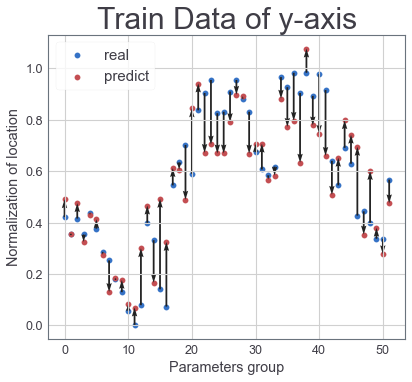

In [142]:
#在训练集上的拟合结果
from jupyterthemes import jtplot
jtplot.style(theme='grade3')
y_train_predict=model.predict(X_train)
#x1,y1=pd.DataFrame(y_train)
y_train_predict=y_train_predict[:,0]
y_train_predict
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
plt.scatter(range(0,len(y_train)),pd.DataFrame(y_train))
plt.scatter(range(0,len(y_train_predict)),pd.DataFrame(y_train_predict),c='r')
plt.quiver(range(0,len(y_train)),draw.iloc[0:150,0],
           (pd.DataFrame(range(0,len(y_train_predict)))-pd.DataFrame(range(0,len(y_train)))),
            (draw.iloc[0:150,1]-draw.iloc[0:150,0]),angles='xy', scale_units='xy', scale=1,width = 0.005)
#draw.iloc[0:150,0]figsize=(12,]
#draw.iloc[0:150,1].plot(figsize=(12,8))]
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data of y-axis",fontsize='30') #添加标题
plt.xlabel('Parameters group')
plt.ylabel('Normalization of location')
y_train_predict=pd.DataFrame(y_train_predict)
#print(y_train_predict)
k= min_max_scaler.fit_transform(pd.DataFrame(draw2y))

print(pd.DataFrame(k))
trainPredict = min_max_scaler.inverse_transform(y_train_predict)
#Aprint(trainPredict)
tr_pd=pd.DataFrame(trainPredict)
tr_pd = tr_pd.iloc[:,0]
#print(tr_pd)
#pd.DataFrame(tr_pd).to_csv('ytrainlocation0.0026.csv')
# q=pd.read_csv()

#plt.savefig('E:/论文写作/testx.jpg',dpi=300)
#展示在训练集上的表现 

           0
0   0.423423
1   0.436937
2   0.509009
3   0.513514
4   0.572072
..       ...
60  0.657658
61  0.918919
62  0.121622
63  0.162162
64  0.081081

[65 rows x 1 columns]
           0
0   0.483778
1   0.339148
2   0.350095
3   0.176195
4   0.507124
5   0.446253
6   0.186739
7   0.185544
8   0.139723
9   0.190757
10  0.084289
11  0.081423
12  0.214805
13  0.403766
14  0.287125
15  0.517766
16  0.308875
17  0.655390
18  0.728175
19  0.568399
20  0.768411
21  0.921985
22  0.808299
23  0.830269
24  0.781657
25  0.872755
26  0.811591
27  0.949243
28  0.887633
29  0.823992
30  0.773909
31  0.681556
32  0.589721
33  0.619856
34  0.896293
35  0.900410
36  0.889808
37  0.715389
38  1.000319
39  0.759105
40  0.818630
41  0.744312
42  0.446089
43  0.705760
44  0.761900
45  0.656587
46  0.470162
47  0.448556
48  0.573138
49  0.512963
50  0.247969
51  0.638391


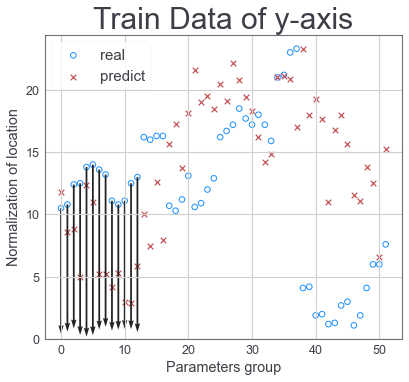

In [119]:
from jupyterthemes import jtplot
jtplot.style(theme='grade3')
y_train_predict=model.predict(X_train)
#x1,y1=pd.DataFrame(y_train)
y_train_predict=y_train_predict[:,0]
y_train_predict
k= min_max_scaler.fit_transform(pd.DataFrame(draw2y))
tr_pd=pd.DataFrame(y_train_predict)
print(pd.DataFrame(k))
y_train_predict = min_max_scaler.inverse_transform(tr_pd)


draw2x1=pd.DataFrame(draw2y).iloc[:52,:]
draw=pd.concat([pd.DataFrame(draw2x1),pd.DataFrame(y_test_predict)],axis=1)
plt.scatter(range(0,len(draw2x1)),pd.DataFrame(draw2x1),marker='o',color='none',edgecolors='#1E90FF',linewidths=1)
plt.scatter(range(0,len(y_train_predict)),pd.DataFrame(y_train_predict),c='r',marker='x')
plt.quiver(range(0,len(y_train)),draw.iloc[0:150,0],
           (pd.DataFrame(range(0,len(y_train_predict)))-pd.DataFrame(range(0,len(draw2x1)))),
            (draw.iloc[0:150,1]-draw.iloc[0:150,0]),angles='xy', scale_units='xy', scale=1,width = 0.005)
#draw.iloc[0:150,0]figsize=(12,]
#draw.iloc[0:150,1].plot(figsize=(12,8))]
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data of y-axis",fontsize='30') #添加标题
plt.xlabel('Parameters group')
plt.ylabel('Normalization of location')
# y_train_predict=pd.DataFrame(y_train_predict)
# #print(y_train_predict)
# k= min_max_scaler.fit_transform(pd.DataFrame(draw2x))

# print(pd.DataFrame(k))
# trainPredict = min_max_scaler.inverse_transform(y_train_predict)
#Aprint(trainPredict)
# tr_pd=pd.DataFrame(y_train_predict)
# tr_pd = tr_pd.iloc[:,0]
print(tr_pd)
# pd.DataFrame(tr_pd).to_csv('trainlocation13.csv')
# q=pd.read_csv()

#plt.savefig('E:/论文写作/testx.jpg',dpi=300)
#展示在训练集上的表现 

0     20.387230
1     23.386518
2     27.139038
3     23.810518
4     17.949944
5     21.067255
6     25.486914
7     28.123386
8     23.171816
9     28.401762
10    24.474468
11    27.585165
12    23.188904
Name: 0, dtype: float32


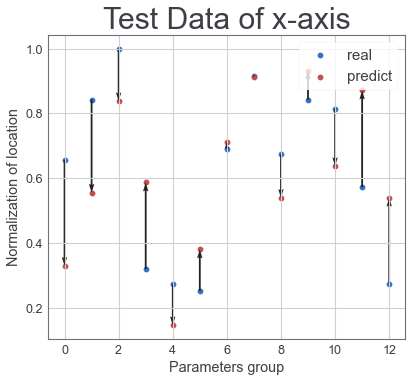

In [143]:
#在测试集上的预测
from jupyterthemes import jtplot
jtplot.style(theme='grade3') #选择一个绘图主题
y_test_predict1=model.predict(X_test)
#y_test_predict1=min_max_scaler.inverse_transform(y_test_predict1)
#y_new = min_max_scaler.inverse_transform(y_test_predict)
y_test_predict=y_test_predict1[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
plt.scatter(range(0,len(y_test)),pd.DataFrame(y_test))
plt.scatter(range(0,len(y_test_predict)),pd.DataFrame(y_test_predict),c='r')
plt.quiver(range(0,len(y_test)),draw.iloc[0:150,0],
           (pd.DataFrame(range(0,len(y_test_predict)))-pd.DataFrame(range(0,len(y_test)))),
            (draw.iloc[0:150,1]-draw.iloc[0:150,0]),angles='xy', scale_units='xy', scale=1,width = 0.005)
# draw.iloc[:,0].plot(figsize=(12,8))
# draw.iloc[:,1].plot(figsize=(12,8))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
plt.title("Test Data of x-axis",fontsize='30') #添加标题
plt.xlabel('Parameters group')
plt.ylabel('Normalization of location')
# train_predict_new = np.zeros(shape=(len(y_test_predict), 2))
# train_predict_new= y_test_predict
# trainPredict = min_max_scaler.inverse_transform(train_predict_new )#
# train_predict_new=np.zeros(shape=(len(dfl.iloc[-9,1]), 1))
# dfl.iloc[-9,1]=y_test_predict
# train_predict_new= dfl.iloc[-9,1]
k1=pd.DataFrame(draw2x).iloc[52:,:]
min_max_scaler.fit_transform(k1) 
y_test_predict=pd.DataFrame(y_test_predict)
y_new = min_max_scaler.inverse_transform(y_test_predict)
print(pd.DataFrame(y_new)[0])
#pd.DataFrame(y_new).to_csv('ytestlocation0.0038.csv')
#y_test_predict1=min_max_scaler.inverse_transform(y_test_predict1)
#plt.savefig('E:/论文写作/ytestdata1.jpg',dpi=300)
#展示在测试集上的表现 

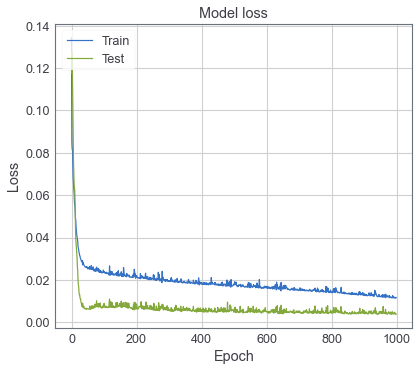

In [9]:
import matplotlib.pyplot as plt
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('E:/论文写作/loss8.jpg')
# plt.show()
# plt.savefig('E:/loss8.jpg')

In [41]:
# #输出结果
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# import math
# def mape(y_true, y_pred):
#     return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
# print('训练集上的MAE/MSE/MAPE')
# print(mean_absolute_error(y_train_predict, y_train))
# print(mean_squared_error(y_train_predict, y_train) )
# print(mape(y_train_predict, y_train[:,0]) )
# print('测试集上的MAE/MSE/MAPE')
# print(mean_absolute_error(y_test_predict, y_test))
# print(mean_squared_error(y_test_predict, y_test) )
# print(mape(y_test_predict,  y_test[:,0]) )
# y_var_test=y_test[1:]-y_test[:len(y_test)-1]
# y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
# txt=np.zeros(len(y_var_test))
# for i in range(len(y_var_test-1)):
#     txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
# result=sum(txt)/len(txt)
# print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.10437308645315382
0.01645700632074296
23.385775952146616
测试集上的MAE/MSE/MAPE
0.11827379858560776
0.021992255781715053
24.69089809237129
预测涨跌正确: 0.45454545454545453


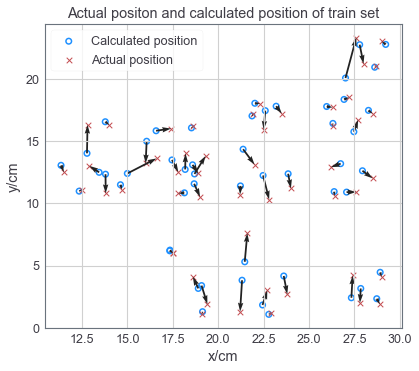

In [107]:
train_true=pd.read_excel('location4.xlsx')

train_truex = train_true.iloc[:52,0]
train_truey = train_true.iloc[:52,1]


train1=pd.read_excel('traindataxy.xlsx') 
#df2=pd.read_excel('location4.xlsx')

train_x = train1['x']

train_y = train1['y']
trainx_pt =pd.concat([pd.DataFrame(train_truex),pd.DataFrame(train_x)],axis=1)
trainy_pt = pd.concat([pd.DataFrame(train_truey), pd.DataFrame(train_y)],axis=1)
plt.scatter(pd.DataFrame(train_x), pd.DataFrame(train_y),label= 'Calculated position',marker='o',color='none',
            edgecolors='#1E90FF',linewidths=1.5)
plt.scatter(pd.DataFrame(train_truex),pd.DataFrame(train_truey),label='Actual position',c='r',linewidths=1,marker='x')
plt.quiver(train_x,train_y,
           (pd.DataFrame(train_truex)-pd.DataFrame(train_x)),
            (pd.DataFrame(train_truey)-pd.DataFrame(train_y)),angles='xy', scale_units='xy', scale=1,width = 0.005)
#my_x_ticks = np.arange(0, 30, 5)#原始数据有13个点，故此处为设置从0开始，间隔为
plt.xlabel('x/cm')
plt.ylabel('y/cm')
plt.title('Actual positon and calculated position of train set')
plt.legend(loc='best')
# plt.xticks(my_x_ticks)
# plt.yticks(my_x_ticks)
#train_truex\
#plt.savefig('E:/论文写作/trainxy.jpg',dpi=300)



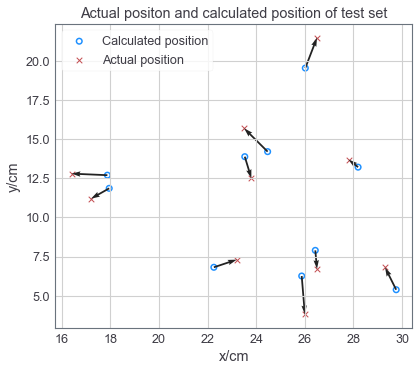

In [149]:
test_true=pd.read_excel('locationtest.xlsx')

test_truex = test_true.iloc[:,0]
test_truey = test_true.iloc[:,1]
test_truex = pd.DataFrame(test_truex)
test_truey = pd.DataFrame(test_truey)

test1=pd.read_excel('testdataxy.xlsx') 
#df2=pd.read_excel('location4.xlsx')

test_x = test1['x']

test_y = test1['y']
# testx_pt =pd.concat([pd.DataFrame(test_truex),pd.DataFrame(test_x)],axis=1)
# testy_pt = pd.concat([pd.DataFrame(test_truey), pd.DataFrame(test_y)],axis=1)
plt.scatter(pd.DataFrame(test_x), pd.DataFrame(test_y),marker='o',color='none',
            edgecolors='#1E90FF',label= 'Calculated position',linewidths=1.5)
plt.scatter(pd.DataFrame(test_truex),pd.DataFrame(test_truey),c='r',label='Actual position',linewidths=1,marker='x')
# #test_y
test_truex
plt.quiver(test_x,test_y,
           (pd.DataFrame(test_truex)-pd.DataFrame(test_x)),
            (pd.DataFrame(test_truey)-pd.DataFrame(test_y)),angles='xy', scale_units='xy', scale=1,width = 0.005)
#my_x_ticks = np.arange(0, 30, 5)#原始数据有13个点，故此处为设置从0开始，间隔为
# plt.xticks(my_x_ticks)
# plt.yticks(my_x_ticks)
plt.xlabel('x/cm')
plt.ylabel('y/cm')
plt.title('Actual positon and calculated position of test set')
plt.legend(loc='best')
#plt.savefig('E:/论文写作/testxy.jpg',dpi=300)